In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [24]:
ndx = pd.read_csv('../dataset/Assets/ndx.csv', encoding='unicode_escape')

In [25]:
#Cleaning and reindexing
def cleaned_asset(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2000-01-01') & (df.index <= '2022-11-02')]
    return df

In [26]:
ndx = cleaned_asset(ndx)

In [27]:
#Nasdaq100 price visualization
def ndx_visualization(): 
    plt.plot(ndx, color= 'b')
    plt.title('NASDAQ 100', fontsize= 20)
    plt.xlabel('Year', fontsize= 20)
    plt.ylabel('Price', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

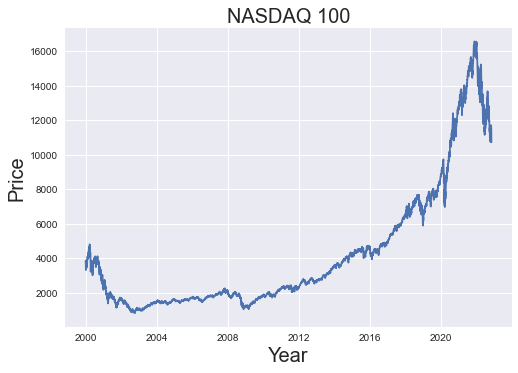

In [29]:
ndx_visualization()